<img src="https://veroviz.org/images/veroviz_logo_401x113.png">

<H1><center>VeRoViz: A Vehicle Routing Visualization Toolkit</center></H1>


This Python Jupyter notebook accompanies the above-titled paper, submitted to *INFORMS Journal on Computing*. 
The purpose of this notebook is to demonstrate some of the basic (core) capabilities of the VeRoViz Python package.  This is done via a fairly simple example involving a truck and a drone that are tasked to deliver parcels.

<div style="clear:both;margin:auto;width:90%;text-align:center;padding-top:15px;">
<div style="float:left; padding:5px;"><img src="https://veroviz.org/images/joc/leaflet_assignments.png" width="400"></div>
<div style="float:left; padding:5px;"><img src="https://veroviz.org/images/joc/leaflet_arcs.png" width="400"></div>
<!--<div style="float:left; padding:5px;"><img src="https://veroviz.org/images/joc/isochrones_walking.png" width="400"></div>-->
<div style="float:left; padding:5px;"><img src="https://veroviz.org/images/joc/cesium_2.png" width="400"></div>
<div style="float:left; padding:5px;"><img src="https://veroviz.org/images/joc/cesium_1.png" width="400"></div>
</div>
<div style="clear:both"></div>


- A pre-publication copy of the paper may be found at https://ssrn.com/abstract=3746037.  
    - This paper may be cited as:
    > Peng, Lan and Murray, Chase C., VeRoViz: A Vehicle Routing Visualization Toolkit (December 10, 2020). Available at SSRN: https://ssrn.com/abstract=3746037.
    - The BibTeX entry for this pre-publication paper is:
    ```
    @article{PengMurray2020,
    title = "VeRoViz: A Vehicle Routing Visualization Toolkit",
    author = "Lan Peng and Chase C. Murray",
    year = "2020",
    url = "https://ssrn.com/abstract=3746037"}    
    ```
    
- Other relevant links:
    - VeRoViz Home:  https://veroviz.org
    - Link to download this notebook:  https://veroviz.org/examples/JOC_paper.zip
    
--- 

<center><H3>TABLE OF CONTENTS</H3></center>

1. [Generate Nodes](#1.-Generate-Nodes)
    1. [Define the regions for depot and customer nodes](#A.-Define-the-regions-for-depot-and-customer-nodes)
    2. [Generate nodes from a distribution](#B.-Generate-nodes-from-a-distribution)
2. [Travel Time & Distance Matrices](#2.-Travel-Time/Distance-Matrices)
    1. [Truck data (road travel)](#A.-Truck-data-(road-travel))
    2. [Drone data (air travel)](#B.-Drone-data-(air-travel))
3. [Generate a Solution](#3.-Generate-a-Solution)
4. [Visualize Vehicle Routes with Simple Arcs](#4.-Visualize-Vehicle-Routes-with-Simple-Arcs)
5. [Visualize Vehicle Routes with Detailed Assignments Dataframes](#5.-Visualize-Vehicle-Routes-with-Detailed-Assignments-Dataframes)
    1. [Turn-by-turn road travel](#A.-Turn-by-turn-road-travel)
    2. [3D Drone flight paths](#B.-3D-Drone-flight-paths)
6. [Visualize 3D Movies in Cesium](#6.-Visualize-3D-Movies-in-Cesium)
7. [Gantt Charts](#7.-Gantt-Charts)
8. [Utility Functions](#8.-Utility-Functions)
    1. [Isochrones](#A.-Isochrones)
    2. [Weather Data](#B.-Weather-Data)
    3. [Elevation](#C.-Elevation)
    4. [Finding the nearest point along a path to a location](#D.-Finding-the-nearest-point-along-a-path-to-a-location)
    5. [Finding vehicle locations at a particular time](#E.-Finding-vehicle-locations-at-a-particular-time)
9. [Leaflet Options/Features](#9.-Leaflet-Options/Features)
    1. [Change Map Background](#A.-Change-Map-Background)
    2. [Overlay Weather Imagery](#B.-Overlay-Weather-Imagery)
10.[Code used to create other figures in the paper](#10.-Code-used-to-create-other-figures-in-the-paper) 

<table style="border:1px solid black;">
    <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Info:</b><br><br>VeRoViz installation instructions can be found at <a href="https://veroviz.org/gettingstarted.html">https://veroviz.org/gettingstarted.html</a></td></tr>
</table>

--- 

## Import Python Libraries



**We'll begin by importing the `veroviz` Python package.**

In [1]:
import veroviz as vrv

**It's a good idea to verify that you're working with the latest version of VeRoViz:**

In [2]:
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

<table style="border:1px solid black;">
    <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Tip:</b><br><br>Documentation for each VeRoViz function is also available by adding a <code>?</code> after the function name.  <br>For example, try: <code>vrv.geocode?</code></td></tr>
</table>

- **NOTE**: The Python `os` library allows the use of system environment variables, which can store frequently-used information (such as API keys or paths to your Cesium installation directory). By saving this information as environment variables, you don't need to copy/paste these values into each new Python script. Additionally, referencing API keys through environment variables makes it easy to share code with others without having to remove your private information.  See https://veroviz.org/gettingstarted.html#setupenv for more information.

In [3]:
import os

--- 

## 1. Generate Nodes

We need some nodes so we have a problem to solve/study.

Our first task is to define the locations of a depot (where the truck and drone will originate) and the customers. There are several ways to do this:
1.  Use Sketch (https://veroviz.org/sketch) to manually define nodes;
2.  Import existing (saved) nodes data using the `vrv.importDataframe()` function; or
3.  Programmatically generate test problems via Python, as shown below.

### A. Define the regions for depot and customer nodes

We begin by defining regions where the depot and customer nodes will be generated. 
- The depot will be located within some polygon, which we drew in Sketch and exported to Python. 
- The customers will be normally distributed around Amherst, NY, with a standard deviation of 1.5 miles.

<div style="text-align:center;margin:auto;clear:both;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
                    <li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.geocode">geocode()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertDistance">convertDistance()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet">createLeaflet()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletText">addLeafletText()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletCircle">addLeafletCircle()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
    <div style="float:left;padding-left:20px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Other related functions:</b>
        <ul>
            <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletIcon">addLeafletIcon()</a></li>
            <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletMarker">addLeafletMarker()</a></li>
            <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletPolygon">addLeafletPolygon()</a></li>
            <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletPolyline">addLeafletPolyline()</a></li>
        </ul>        
                </td></tr>
        </table>
    </div>
</div>

In [4]:
# Define a region within which the depot will be generated.  
# These coordinates were obtained from Sketch (https://veroviz.org.sketch).
depotRegion =  [[42.9888275948543, -78.7189292907715], 
                [42.96232703466335, -78.71103286743165], 
                [42.968984647488014, -78.67687225341797], 
                [43.00690672861231, -78.69489669799806]]

# Define a center point for customers.  The geocode() function returns [lat, lon] coordinates.
amherst = vrv.geocode('Amherst, NY')

# Define a radius for 1 standard deviation, in units of meters.
radiusMeters = vrv.convertDistance(1.5, 'miles', 'meters')

In [5]:
# Draw the depot region polygon, and add a text label:
myMap = vrv.createLeaflet(boundingRegion = depotRegion)
myMap = vrv.addLeafletText(mapObject   = myMap, 
                           text        = 'Depot Region', 
                           fontColor   = 'black',
                           anchorPoint = depotRegion[3])

# Draw the customer region with circles, and label according to standard deviation:
myMap = vrv.addLeafletCircle(mapObject = myMap, 
                             center    = amherst, 
                             radius    = 3*radiusMeters, 
                             fillColor = 'red')

myMap = vrv.addLeafletText(mapObject   = myMap, 
                           text        = '3 std. devs.', 
                           fontColor   = 'black',
                           anchorPoint = vrv.pointInDistance2D(amherst, 180, 3*radiusMeters))

myMap = vrv.addLeafletCircle(mapObject = myMap, 
                             center    = amherst,
                             radius    = 1*radiusMeters, 
                             fillColor = 'blue')

myMap = vrv.addLeafletText(mapObject   = myMap, 
                           text        = '1 std. dev.', 
                           fontColor   = 'black',
                           anchorPoint = vrv.pointInDistance2D(amherst, 180, radiusMeters))

myMap

### B. Generate nodes from a distribution

Next, we generate the nodes from the defined regions, including one depot (node 0) and five customers (nodes 1--5).  
The [generateNodes()](https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.generateNodes) function produces a VeRoViz <a href="https://veroviz.org/docs/nodes.html">"nodes" dataframe</a>, which contains information about the location of each node, as well as names, and formatting for the appearance of the nodes on a map. 

VeRoViz can generate nodes from three different types of distributions:  
- uniformly distributed within a bounding region, 
- normally distributed, or 
- normally distributed and bounded within a polygon.  

All of the nodes in this example are snapped to the road network, the data for which is provided (in this case) by the "OSRM-online" data provider.  


<div style="text-align:center;margin:auto;clear:both;margin-top:10px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
                    <li><a href="https://veroviz.org/docs/nodes.html">"Nodes" dataframe description</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.importDataframe">importDataframe()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.generateNodes">generateNodes()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet">createLeaflet()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>

In [6]:
# Generate a depot within the polygon boundary
myNodes = vrv.generateNodes(numNodes        = 1, 
                            startNode       = 0, 
                            nodeType        = 'depot', 
                            snapToRoad      = True,
                            nodeDistrib     = 'uniformBB', 
                            dataProvider    = 'OSRM-online',
                            nodeDistribArgs = {'boundingRegion': depotRegion})


# Also generate 5 customer nodes, normally distributed, with custom circle markers
myNodes = vrv.generateNodes(initNodes         = myNodes, 
                            numNodes          = 5, 
                            startNode         = 1,
                            nodeType          = 'customer', 
                            snapToRoad        = True,
                            leafletIconPrefix = 'custom', 
                            leafletIconType   = '12-white-12',
                            leafletColor      = 'green', 
                            nodeDistrib       = 'normal', 
                            dataProvider      = 'OSRM-online',
                            nodeDistribArgs   = {'center': amherst, 'stdDev': radiusMeters})

<div style="text-align:center;margin:auto;clear:both;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/error_small.png" title="Warning" style="width:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Note:</b><br><br>
                The cell above will generate nodes in different locations each time the cell is run.
                <br>
                If you wish to use the exact nodes that were included in the paper, run the following cell <b>instead</b>.
                </td></tr>
        </table>
    </div>
</div>

In [7]:
# OPTIONAL
# Import the nodes that were used in the paper:
myNodes = vrv.importDataframe('data/paperNodes.csv')

In [8]:
# Display the nodes dataframe
myNodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters
0,0,43.003922,-78.697982,0.0,Depot,depot,0,glyphicon,info-sign,blue,0,pin,blue,0,NaN
1,1,42.951958,-78.795942,0.0,Cust. 1,customer,1,custom,12-white-12,green,1,pin,blue,1,NaN
2,2,42.974264,-78.820277,0.0,Cust. 2,customer,2,custom,12-white-12,green,2,pin,blue,2,NaN
3,3,42.974697,-78.798269,0.0,Cust. 3,customer,3,custom,12-white-12,green,3,pin,blue,3,NaN
4,4,42.998253,-78.794730,0.0,Cust. 4,customer,4,custom,12-white-12,green,4,pin,blue,4,NaN
5,5,42.993819,-78.802980,0.0,Cust. 5,customer,5,custom,12-white-12,green,5,pin,blue,5,NaN


In [9]:
# Add nodes to the previously-created map:
vrv.createLeaflet(mapObject = myMap,
                  nodes     = myNodes)

--- 

## 2. Travel Time/Distance Matrices

Before solving our routing problem, we want to know the distances between all pairs of nodes.  


### A. Truck data (road travel)

VeRoViz provides the [getTimeDist2D()](https://veroviz.org/docs/veroviz.getTimeDist2D.html#veroviz.getTimeDist2D.getTimeDist2D) function to capture matrices for ground-based (2-dimensional) travel time and distance between nodes. In this example, we seek these values based on the fastest time between nodes; alternatively, we could make the request based on the shortest distance.  Available route type options for each data provider are given in https://veroviz.org/docs/dataproviders.html.

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
                    <li><a href="https://veroviz.org/docs/veroviz.getTimeDist2D.html#veroviz.getTimeDist2D.getTimeDist2D">getTimeDist2D()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDictionaryToDataframe">convertMatricesDictionaryToDataframe()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>

In [10]:
# Travel Matrices -- Truck
# Find truck's travel time (in seconds) and distance (in meters) 
# between all pairs of nodes.
# We're looking for the fastest time.  Alternatively, we could look
# for the shortest distance.
[timeSec, distMeters] = vrv.getTimeDist2D(nodes        = myNodes, 
                                          routeType    = 'fastest',
                                          dataProvider = 'OSRM-online')

In [11]:
# Here's the distance, in meters, from node 0 to node 3:
distMeters[0,3]

11843.5

- The [getTimeDist2D()](https://veroviz.org/docs/veroviz.getTimeDist2D.html#veroviz.getTimeDist2D.getTimeDist2D) function returns travel time and distance information in dictionaries.  If you'd prefer to see this information in matrix/table format, apply the [convertMatricesDictionaryToDataframe()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDictionaryToDataframe) function:

In [12]:
# Display as a nicely-formatted matrix:
vrv.convertMatricesDictionaryToDataframe(distMeters)

,0,1,2,3,4,5
0,0.0,12880.3,14166.4,11843.5,10578.6,12297.0
1,13308.3,0.0,4956.1,2932.4,6660.2,6550.6
2,13619.9,4956.1,0.0,3480.7,5355.6,5427.2
3,11327.6,3068.0,3549.0,0.0,3323.3,3135.0
4,10773.9,6838.3,5390.6,3501.4,0.0,3186.5
5,21690.9,12667.5,8869.5,12266.5,12058.1,0.0


### B. Drone data (air travel)

For the drone in our example, we use the [getTimeDist3D()](https://veroviz.org/docs/veroviz.getTimeDist3D.html#veroviz.getTimeDist3D.getTimeDist3D) function, with the default "square" profile (i.e., the drone takes off and lands vertically).  Available flight profiles are shown in the figure below, including Available drone flight profiles include "square" (yellow), "trapezoidal" (white), "triangular" (green) and "straight" (red).  Additional documentation is available at https://veroviz.org/docs/flight_profile_and_flight_path.html.  

<img src="https://veroviz.org/images/joc/drone_profiles.png" width="400"> 


Since the drone in this problem only travels between the depot and a single customer at a time, a one-to-many distance matrix (i.e., a single row of generated data) is sufficient.  

In this example, the total travel time from the depot to customer 4 is given by `timeSecUAV[0,4] = 514.16` seconds.

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
                    <li><a href="https://veroviz.org/docs/veroviz.getTimeDist3D.html#veroviz.getTimeDist3D.getTimeDist3D">getTimeDist3D()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDictionaryToDataframe">convertMatricesDictionaryToDataframe()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>

In [13]:
# Travel Matrices -- Drone
# We only need departures from the depot 
# (the return trip will be assumed symmetric)
[timeSecUAV, groundDistUAV, totalDistUAV] = vrv.getTimeDist3D(
    nodes              = myNodes,  
    matrixType         = 'one2many', 
    fromNodeID         = 0, 
    takeoffSpeedMPS    = vrv.convertSpeed(10, 'miles', 'hr', 'meters', 'sec'),
    cruiseSpeedMPS     = vrv.convertSpeed(40, 'miles', 'hr', 'meters', 'sec'),
    landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
    cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'), 
    routeType          = 'square', 
    outputDistUnits    = 'meters', 
    outputTimeUnits    = 'seconds')

In [14]:
# Here's the travel time, in seconds, from the depot to node 2:
timeSecUAV[0,2]

659.0081818458798

- The [getTimeDist2D()](https://veroviz.org/docs/veroviz.getTimeDist2D.html#veroviz.getTimeDist2D.getTimeDist2D) function returns travel time and distance information in dictionaries.  If you'd prefer to see this information in matrix/table format, apply the [convertMatricesDictionaryToDataframe()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDictionaryToDataframe) function:

In [15]:
# Display as a nicely-formatted matrix:
vrv.convertMatricesDictionaryToDataframe(timeSecUAV)

,0,1,2,3,4,5
0,0.0,622.870915,659.008182,563.704278,514.163591,554.493559


--- 

## 3. Generate a Solution

The next step would typically be to solve the problem.  Because **VeRoViz is not a solver**, for demonstration purposes we will manually generate a solution that simply describes the sequence of node visits for both the truck and the drone.  

- *In practice, this is the step where researchers would apply their own algorithms to generate a solution.*
    
<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
                    <li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.nearestNodes">nearestNodes()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>    

In [16]:
# Initialize an empty dictionary to store our vehicle routes:
route = {}

In [17]:
# The drone visits the 2 nearest customers
# (returning to the depot between each customer)

route['drone'] = [0]

droneCusts = vrv.nearestNodes(
                 nodes    = myNodes,
                 origin   = 0,  # depot
                 costDict = timeSecUAV,
                 k        = 2)['id'].values.tolist()

for i in droneCusts:
    route['drone'].extend([i, 0])

print("Drone Route:", route['drone'])

Drone Route: [0, 4, 0, 5, 0]


In [18]:
# The truck visits the remaining customers

# Exclude the drone customers from consideration
truckNodes = myNodes[~myNodes['id'].isin(droneCusts)]

# Solve TSP using a simple nearest-neighbors heuristic
startNode = 0 # depot      # myNodes[myNodes['nodeType'] == 'depot']['id'].values[0]
route['truck'] = [startNode]
while (len(route['truck']) < len(truckNodes)):
    closestNode = vrv.nearestNodes(nodes    = truckNodes[~truckNodes['id'].isin(route['truck'][0:-1])], 
                                   origin   = route['truck'][-1], 
                                   costDict = distMeters,
                                   k        = 1)['id'].values[0]
    route['truck'].append(closestNode)

# Return to depot
route['truck'].append(startNode)

print("Truck Route:", route['truck'])

Truck Route: [0, 3, 1, 2, 0]


In [19]:
print("Drone Route:", route['drone'])
print("Truck Route:", route['truck'])

Drone Route: [0, 4, 0, 5, 0]
Truck Route: [0, 3, 1, 2, 0]


--- 

## 4. Visualize Vehicle Routes with Simple Arcs

With a solution to the problem in hand, it is often useful to visualize the vehicle routes on a map.  

VeRoViz provides the [createArcsFromNodeSeq()](https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromNodeSeq) function to easily generate an ["arcs" dataframe](https://veroviz.org/docs/arcs.html) from a route defined by node visits.  The arcs dataframe contains information about the origin and destination of each route segment for each vehicle, but it does not include arrival or departure times.  

Arcs dataframes are useful for simple graphics, where detailed turn-by-turn directions are not necessary; such details are more appropriately captured in ["assignments" dataframes](https://veroviz.org/docs/assignments.html), as described in [Section 5](#5.-Visualize-Vehicle-Routes-with-Detailed-Assignments-Dataframes) below.

The arcs dataframe also captures the styling of the arcs (e.g., colors and line styles) to be displayed in a Leaflet via the [createLeaflet()](https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet) function.  We use curved arcs for the drone to more easily observe the out-and-back routes. 

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;max-width:45%;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
                    <li><a href="https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromNodeSeq">createArcsFromNodeSeq()</a></li>
                    <li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet">createLeaflet()</a></li>                    
                </ul>        
                </td></tr>
        </table>
    </div>
    <div style="float:left;padding-left:20px;max-width:45%;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="width:90px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Other related functions:</b>
        <ul>
            <li><a href="https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromLocSeq">createArcsFromLocSeq()</a> - generate an arcs dataframe from a sequence of GPS coordinates.</li>
        </ul>        
                </td></tr>
        </table>
    </div>
</div>    

In [20]:
# Convert the truck's route to an "arcs" dataframe:
myArcs = vrv.createArcsFromNodeSeq(nodeSeq  = route['truck'], 
                                   nodes    = myNodes, 
                                   objectID = 'Truck')

In [21]:
# Convert the drone's route to an "arcs" dataframe, using dashed curved arcs:
myArcs = vrv.createArcsFromNodeSeq(initArcs         = myArcs,  
                                   nodeSeq          = route['drone'], 
                                   nodes            = myNodes,
                                   objectID         = 'Drone', 
                                   leafletColor     = 'blue', 
                                   leafletStyle     = 'dotted',
                                   leafletCurveType = 'bezier', 
                                   leafletCurvature = 8, 
                                   cesiumColor      = 'blue')

In [22]:
# Display contents of the arcs dataframe
myArcs

,odID,objectID,startLat,startLon,endLat,endLon,leafletColor,leafletWeight,leafletStyle,leafletOpacity,leafletCurveType,leafletCurvature,useArrows,cesiumColor,cesiumWeight,cesiumStyle,cesiumOpacity,popupText,startElevMeters,endElevMeters
0,1,Truck,43.003922,-78.697982,42.974697,-78.798269,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None
1,2,Truck,42.974697,-78.798269,42.951958,-78.795942,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None
2,3,Truck,42.951958,-78.795942,42.974264,-78.820277,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None
3,4,Truck,42.974264,-78.820277,43.003922,-78.697982,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None
4,5,Drone,43.003922,-78.697982,42.998253,-78.794730,blue,3,dotted,0.8,bezier,8,True,blue,3,solid,0.8,None,None,None
5,6,Drone,42.998253,-78.794730,43.003922,-78.697982,blue,3,dotted,0.8,bezier,8,True,blue,3,solid,0.8,None,None,None
6,7,Drone,43.003922,-78.697982,42.993819,-78.802980,blue,3,dotted,0.8,bezier,8,True,blue,3,solid,0.8,None,None,None
7,8,Drone,42.993819,-78.802980,43.003922,-78.697982,blue,3,dotted,0.8,bezier,8,True,blue,3,solid,0.8,None,None,None


In [23]:
vrv.createLeaflet(nodes = myNodes,
                  arcs  = myArcs)

--- 

## 5. Visualize Vehicle Routes with Detailed Assignments Dataframes

While the ["arcs" dataframe](https://veroviz.org/docs/arcs.html) is sufficient for simple straight-line connections between nodes, the VeRoViz ["assignments" dataframe](https://veroviz.org/docs/assignments.html) holds detailed time-based turn-by-turn routing information on road networks.

These routes may be visualized on a static map using the [createLeaflet()](https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet) function.  However, the additional details contained in the assignments dataframe (including 3D models of vehicles) allow the generation of time-dynamic 3D movies in Cesium.  Assignments dataframes also allow representation of static objects, such as vehicles that are stationary during a service stop or even packages that are delivered.

The process of generating the assignments dataframe associated with the solution to our test problem is described below.  


<!--<table style="border:1px solid black;">
    <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="width:80px"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Tip:</b><br><br>
VeRoViz provides several other functions to help the user create a new "assignments"
dataframe, or append routes into an existing "assignments" dataframe. These are documented at https://veroviz.org/docs/veroviz.createAssignments.html.        
        </td></tr>
</table>
-->


### A. Turn-by-turn road travel

For the truck, we employ the [createAssignmentsFromArcs2D()](https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromArcs2D) function to easily extend our previously-created arcs dataframe into an assignments dataframe.  We will a 30-second service time at each node.  The resulting assignments dataframe will contain the turn-by-turn routing on the road network.

<div style="text-align:center;margin:auto;clear:both;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromArcs2D">createAssignmentsFromArcs2D()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
    <div style="float:left;padding-left:20px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Other related functions:</b>
        <ul>
<li><a href="https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromLocSeq2D">createAssignmentsFromLocSeq2D()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromNodeSeq2D">createAssignmentsFromNodeSeq2D()</a></li>
        </ul>        
                </td></tr>
        </table>
    </div>
</div>

In [24]:
# Turn-by-turn road network travel for the truck:
myAssignments = vrv.createAssignmentsFromArcs2D(
        arcs             = myArcs[myArcs['objectID'] == 'Truck'],
        modelFile        = 'veroviz/models/ub_truck.gltf',
        routeType        = 'fastest',
        dataProvider     = 'OSRM-online',
        serviceTimeSec   = 30,
        ganttColor       = 'orange')

### B. 3D Drone flight paths

For the drone, we wish to differentiate the segments of the route where the drone is carrying a parcel.  We will iteratively call the [addAssignment3D()](https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addAssignment3D) function for each origin-destination pair. 

*NOTE: This is a slightly different version than appears in the paper.  This version adds static assignments for drone packages.*

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addAssignment3D">addAssignment3D()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addStaticAssignment">addStaticAssignment()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>   



In [25]:
# Create assignments for the drone:
endTimeSec = 0.0

i = route['drone'][0]
for j in route['drone'][1:]:
    model = 'drone_package.gltf' if (myNodes['nodeType'][i] == 'depot') else 'drone.gltf'

    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'Drone',
        modelFile          = 'veroviz/models/' + model,
        startLoc           = list(myNodes[myNodes['id'] == i][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == j][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(10, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(40, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        leafletColor       = 'blue',      
        leafletStyle       = 'dotted',
        leafletCurveType   = 'bezier',    
        leafletCurvature   = 2,        
        cesiumColor        = 'blue')

    if (myNodes['nodeType'][i] == 'depot'):
        # Drop off a package
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'Package %d' % (j),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == j][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,  
            endTimeSec       = -1)
    
    i = j

We now show the resulting assignments dataframe.  The `odID` column provides a unique identifier for each origin-destination (OD) pair.  For the truck, a given OD pair will contain numerous individual straight-line segments (so-called "shapepoints") comprising the route on the road network.  For the drone, the OD pair is decomposed into the different flight phases (e.g., vertical takeoff to altitude, cruising at altitude, and vertical landing).  Documentation for each column is provided at https://veroviz.org/docs/assignments.html.

In [26]:
# Display the assignments dataframe:
myAssignments

,odID,objectID,modelFile,modelScale,modelMinPxSize,startTimeSec,startLat,startLon,startAltMeters,endTimeSec,...,ganttColor,popupText,startElevMeters,endElevMeters,wayname,waycategory,surface,waytype,steepness,tollway
0,1,Truck,/veroviz/models/ub_truck.gltf,100,75,0.000000,43.003922,-78.697982,0,5.56972,...,orange,None,None,None,None,None,None,None,None,None
1,1,Truck,/veroviz/models/ub_truck.gltf,100,75,5.569717,43.003334,-78.697459,0,8.67324,...,orange,None,None,None,None,None,None,None,None,None
2,1,Truck,/veroviz/models/ub_truck.gltf,100,75,8.673244,43.003326,-78.696926,0,34.9039,...,orange,None,None,None,None,None,None,None,None,None
3,1,Truck,/veroviz/models/ub_truck.gltf,100,75,34.903860,43.000019,-78.696908,0,66.5361,...,orange,None,None,None,None,None,None,None,None,None
4,1,Truck,/veroviz/models/ub_truck.gltf,100,75,66.536051,42.996031,-78.696930,0,74.8883,...,orange,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,9,Drone,/veroviz/models/drone_package.gltf,100,75,1535.093350,42.993819,-78.802980,106.68,1582.82,...,darkgray,None,None,None,None,None,None,None,None,None
212,10,Package 5,/veroviz/models/box_yellow.gltf,100,75,1582.820742,42.993819,-78.802980,0,-1,...,darkgray,None,None,None,None,None,None,None,None,None
213,11,Drone,/veroviz/models/drone.gltf,100,75,1582.820742,42.993819,-78.802980,0,1606.68,...,darkgray,None,None,None,None,None,None,None,None,None
214,11,Drone,/veroviz/models/drone.gltf,100,75,1606.684437,42.993819,-78.802980,106.68,2089.59,...,darkgray,None,None,None,None,None,None,None,None,None


In [27]:
vrv.createLeaflet(nodes = myNodes,
                  arcs  = myAssignments)

--- 

##  6. Visualize 3D Movies in Cesium

Perhaps the most novel and powerful feature of VeRoViz is the ability to easily generate 3D movies of vehicle routing problems.  

The [createCesium()](https://veroviz.org/docs/veroviz.createCesium.html#veroviz.createCesium.createCesium)  function simply requires the nodes and assignments dataframes, as well as the location where the Cesium application is installed and the name we wish to give our problem.  The [VeRoViz Cesium plugin](https://veroviz.org/downloads/index.html) allows this content to be viewed in a web browser.  

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.createCesium.html#veroviz.createCesium.createCesium">createCesium()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>   

<table style="border:1px solid black;">
    <tr><td bgcolor="white" width="65"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;" width="50"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Tip:</b><br><br>The Python <code>os</code> library allows the use of system environment variables, which can store frequently-used information (such as API keys or paths to your Cesium installation directory). By saving this information as environment variables, you don't need to copy/paste these values into each new Python script. Additionally, referencing API keys through environment variables makes it easy to share code with others without having to remove your private information.  See <a href="https://veroviz.org/gettingstarted.html#setupenv">https://veroviz.org/gettingstarted.html#setupenv</a> for more information.</td></tr>
</table>

In [28]:
# Define the location where Cesium is installed.
# See https://veroviz.org/gettingstarted.html#setupenv 
# for more information on how to set environment variables.

CESIUM_DIR = os.environ['CESIUMDIR']  

In [29]:
vrv.createCesium(assignments = myAssignments,
                 nodes       = myNodes,
                 startTime   = '08:00:00',
                 cesiumDir   = CESIUM_DIR,
                 problemDir  = 'ourpaper/cesium_demo')

Message: File selector was written to /Users/murray/cesium/ourpaper/cesium_demo/;ourpaper;cesium_demo.vrv ...
Message: Configs were written to /Users/murray/cesium/ourpaper/cesium_demo/config.js ...
Message: Nodes were written to /Users/murray/cesium/ourpaper/cesium_demo/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/ourpaper/cesium_demo/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/ourpaper/cesium_demo/routes.czml ...


- The Cesium movie may be tested at https://veroviz.org/cesium_joc.html

---

## 7. Gantt Charts

Gantt charts showing the timing of vehicle routes, from an assignments dataframe, may be generated with the [createGantt()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.createGantt) function.  Configuration options exist for adding labels, hiding/showing grid lines, and grouping vehicles.  Gantt charts can be exported as images.

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.createGantt">createGantt()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>   

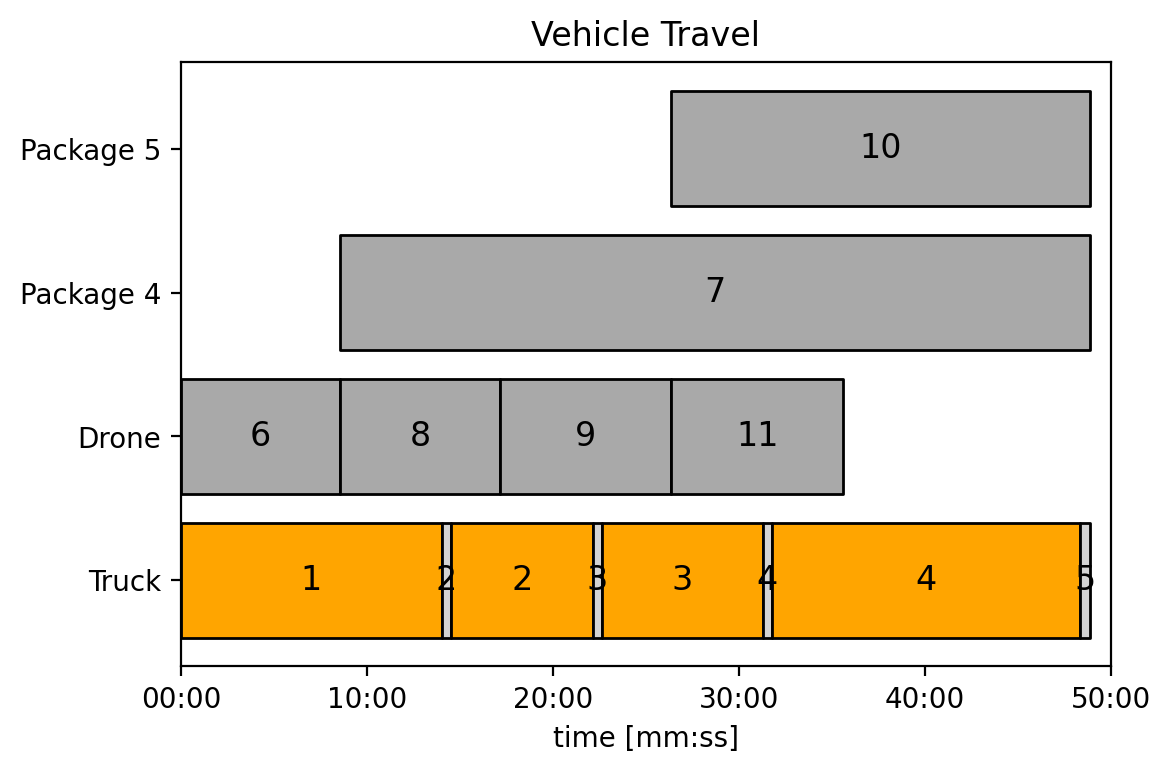

In [30]:
# Create (and save) a Gantt chart using all of the available settings.
# Numbers in the boxes are odID values from the assignments dataframe.
vrv.createGantt(assignments   = myAssignments, 
                # objectIDorder = ['Truck', 'Drone'], 
                title         = 'Vehicle Travel',
                xAxisLabel    = 'time [mm:ss]',
                xGridFreq     = vrv.convertTime(10, 'min', 's'),
                timeFormat    = 'MS',
                overlayColumn = 'odID',
                filename      = 'myGantt.png')

--- 

## 8. Utility Functions

VeRoViz features a large collection of "utility" functions, as described at https://veroviz.org/docs/veroviz.utilities.html.  This section provides an overview of some of these functions.

<table style="border:1px solid black;">
    <tr><td bgcolor="white" width="65"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;" width="50"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Tip:</b><br><br>This section makes frequent use of the Python <code>os</code> library.  See <a href="https://veroviz.org/gettingstarted.html#setupenv">https://veroviz.org/gettingstarted.html#setupenv</a> for more information on how to set environment variables, which we will use to store the API keys for various data providers.</td></tr>
</table>

### A. Isochrones
Isochrones are lines representing equal distance or travel time from (or to) a given point.  The VeRoViz [isochrones()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isochrones) function makes it easy to obtain this data from the [Open Route Service](https://openrouteservice.org) data provider.  Isochrones may be generated for various travel modes, including pedestrian, cycling, car, and heavy trucks.  The [addLeafletIsochrones()](https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletIsochrones) function displays the resulting isochrones on a map.

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isochrones">isochrones()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletIsochrones">
    addLeafletIsochrones()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.geocode">geocode()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertTime">convertTime()</a></li>                </ul>        
                </td></tr>
        </table>
    </div>
</div>   

In [31]:
# Grab the API key for the ORS data provider.
ORS_KEY = os.environ['ORSKEY']  

In [32]:
iso = vrv.isochrones(location         = vrv.geocode('Courthouse, Buffalo, NY'),
                     locationType     = 'start',
                     travelMode       = 'foot-walking',
                     rangeType        = 'time',
                     rangeSize        = vrv.convertTime(12, 'minutes', 'seconds'),
                     interval         = vrv.convertTime(6, 'minutes', 'seconds'),
                     smoothing        = 15,
                     dataProvider     = 'ors-online',
                     dataProviderArgs = {'APIkey': ORS_KEY})

vrv.addLeafletIsochrones(iso = iso)

In [33]:
# View the iso information:
iso

{'location': [42.88758265, -78.87840472648898],
 'boundingRegion': [[42.879748, -78.88787],
  [42.896716, -78.88787],
  [42.896716, -78.86782],
  [42.879748, -78.86782],
  [42.879748, -78.88787]],
 'isochrones': [{'value': 360.0,
   'valueUnits': 'seconds',
   'area': 557970.24,
   'pop': 1060.0,
   'reachfactor': 0.7104,
   'poly': [[[42.887257, -78.883515],
     [42.885897, -78.882447],
     [42.884917, -78.88142],
     [42.884167, -78.880268],
     [42.884071, -78.880087],
     [42.884305, -78.877223],
     [42.884389, -78.876405],
     [42.885635, -78.874696],
     [42.886924, -78.873344],
     [42.887279, -78.873283],
     [42.888858, -78.873701],
     [42.8907, -78.875435],
     [42.891534, -78.876309],
     [42.891991, -78.877597],
     [42.892128, -78.878143],
     [42.89126, -78.882489],
     [42.891014, -78.882751],
     [42.889808, -78.883281],
     [42.887833, -78.883472],
     [42.887257, -78.883515]]]},
  {'value': 720.0,
   'valueUnits': 'seconds',
   'area': 2076706.18,

### B. Weather Data

The [getWeather()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getWeather) function imports current and forecasted weather conditions data from [OpenWeatherMap](https://openweathermap.org), including the probability of precipitation, wind speed and direction, and temperature.


<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getWeather">getWeather()</a></li><li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.geocode">geocode()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>   

In [34]:
# Grab the API key for the OpenWeatherMap data provider.
OPENWEATHER_KEY = os.environ['OPENWEATHERKEY']  

In [35]:
# Get weather data, saved as a dataframe:
weatherDF = vrv.getWeather(location         = vrv.geocode('Buffalo, NY'),
                           dataProvider     = 'openweather',
                           dataProviderArgs = {'APIkey': OPENWEATHER_KEY})

In [36]:
# Display current weather (subset of columns shown)
weatherDF[weatherDF['class']=='current'][['sunrise', 'sunset', 'temp', 'feels_like', 'clouds', 
                                          'weather_description', 'uvi', 'wind_speed', 'wind_deg']]

,sunrise,sunset,temp,feels_like,clouds,weather_description,uvi,wind_speed,wind_deg
0,2021-01-14 12:43:52,2021-01-14 22:05:04,37.9,31.46,90,mist,0.04,5.75,250


In [37]:
# Display hourly forecast (subset of columns and rows shown)
# 'pop' --> probability of precipitation
weatherDF[weatherDF['class'] == 'hourly'][['dt', 'weather_description', 'wind_speed', 'wind_deg', 
                                           'temp', 'humidity', 'pop']].head()

,dt,weather_description,wind_speed,wind_deg,temp,humidity,pop
1,2021-01-14 21:00:00,overcast clouds,2.33,217,37.90,87,0.0
2,2021-01-14 22:00:00,overcast clouds,1.68,194,37.24,91,0.0
3,2021-01-14 23:00:00,overcast clouds,2.08,137,36.77,93,0.0
4,2021-01-15 00:00:00,overcast clouds,3.36,111,36.52,94,0.0
5,2021-01-15 01:00:00,overcast clouds,4.63,105,36.32,94,0.0


In [38]:
# Daily forecast (subset of columns and rows shown)
weatherDF[weatherDF['class'] == 'daily'][['dt', 'weather_description', 'wind_speed', 'wind_deg', 
                                          'temp_min', 'temp_max', 'pop']].head()

,dt,weather_description,wind_speed,wind_deg,temp_min,temp_max,pop
49,2021-01-14 17:00:00,overcast clouds,3.02,278,35.69,37.90,0.13
50,2021-01-15 17:00:00,moderate rain,10.07,136,34.90,41.41,1.00
51,2021-01-16 17:00:00,rain and snow,17.92,240,32.36,36.90,1.00
52,2021-01-17 17:00:00,light snow,15.46,273,29.01,32.49,0.86
53,2021-01-18 17:00:00,light snow,6.04,324,22.01,26.94,0.39


### C. Elevation

The [getElevationDF()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getElevationDF) function updates the elevation-related columns of ["nodes"](https://veroviz.org/docs/nodes.html), ["arcs"](https://veroviz.org/docs/arcs.html), and ["assignments"](https://veroviz.org/docs/assignments.html) dataframes, using data from a variety of sources.  

In this example we'll use [U.S. Geological Survey (USGS)](https://nationalmap.gov/epqs/) as a data provider; elevation data are also available from [Elevation-API](https://elevation-api.io./) and [OpenRouteService](https://openrouteservice.org/).

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>These functions are used in this section:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getElevationDF">getElevationDF()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
</div>   

In [39]:
# We generated our nodes dataframe using the 'OSRM-online' 
# data provider, which does not offer elevation data. 
myNodes[['id', 'lat', 'lon', 'elevMeters']]

,id,lat,lon,elevMeters
0,0,43.003922,-78.697982,NaN
1,1,42.951958,-78.795942,NaN
2,2,42.974264,-78.820277,NaN
3,3,42.974697,-78.798269,NaN
4,4,42.998253,-78.794730,NaN
5,5,42.993819,-78.802980,NaN


In [40]:
# Replace missing elevation data using USGS data.
# No API key is required.
vrv.getElevationDF(dataframe    = myNodes, 
                   dataProvider = 'usgs')
myNodes[['id', 'lat', 'lon', 'elevMeters']]

,id,lat,lon,elevMeters
0,0,43.003922,-78.697982,185.08
1,1,42.951958,-78.795942,209.43
2,2,42.974264,-78.820277,182.85
3,3,42.974697,-78.798269,183.32
4,4,42.998253,-78.794730,182.23
5,5,42.993819,-78.802980,182.76


In [41]:
# Replace elevation data using ORS-online.
vrv.getElevationDF(dataframe        = myNodes, 
                   replaceOnlyNone  = False,
                   dataProvider     = 'ors-online',
                   dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
myNodes[['id', 'lat', 'lon', 'elevMeters']]

,id,lat,lon,elevMeters
0,0,43.003922,-78.697982,187.0
1,1,42.951958,-78.795942,215.0
2,2,42.974264,-78.820277,184.0
3,3,42.974697,-78.798269,189.0
4,4,42.998253,-78.794730,184.0
5,5,42.993819,-78.802980,182.0


**We can also update 'arcs' and 'assignments' dataframes with elevation data.**

In [42]:
# Replace missing start/end elevations in the arcs dataframe, using USGS data:
vrv.getElevationDF(dataframe    = myArcs, 
                   dataProvider = 'usgs')
myArcs[['startLat', 'startLon', 'startElevMeters', 'endLat', 'endLon', 'endElevMeters']]

,startLat,startLon,startElevMeters,endLat,endLon,endElevMeters
0,43.003922,-78.697982,185.08,42.974697,-78.798269,183.32
1,42.974697,-78.798269,183.32,42.951958,-78.795942,209.43
2,42.951958,-78.795942,209.43,42.974264,-78.820277,182.85
3,42.974264,-78.820277,182.85,43.003922,-78.697982,185.08
4,43.003922,-78.697982,185.08,42.998253,-78.794730,182.23
5,42.998253,-78.794730,182.23,43.003922,-78.697982,185.08
6,43.003922,-78.697982,185.08,42.993819,-78.802980,182.76
7,42.993819,-78.802980,182.76,43.003922,-78.697982,185.08


In [43]:
# Replace start/end elevations in the arcs dataframe, using ORS-online data:
vrv.getElevationDF(dataframe        = myArcs, 
                   replaceOnlyNone  = False,
                   dataProvider     = 'ORS-online',
                   dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
myArcs[['startLat', 'startLon', 'startElevMeters', 'endLat', 'endLon', 'endElevMeters']]

,startLat,startLon,startElevMeters,endLat,endLon,endElevMeters
0,43.003922,-78.697982,187,42.974697,-78.798269,189
1,42.974697,-78.798269,189,42.951958,-78.795942,215
2,42.951958,-78.795942,215,42.974264,-78.820277,184
3,42.974264,-78.820277,184,43.003922,-78.697982,187
4,43.003922,-78.697982,187,42.998253,-78.794730,184
5,42.998253,-78.794730,184,43.003922,-78.697982,187
6,43.003922,-78.697982,187,42.993819,-78.802980,182
7,42.993819,-78.802980,182,43.003922,-78.697982,187


### D. Finding the nearest point along a path to a location

The [closestPointLoc2Assignments()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.closestPointLoc2Assignments) function provides the `[lat, lon]` coordinates along a vehicle's route that are closest (in Euclidean distance) to a given location.  In other words, this function determines where a vehicle's route will pass nearest some location of interest.  

In the following example, we'll see where the truck's path is closest to the Buffalo Airport.

<div style="text-align:center;margin:auto;clear:both;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.closestPointLoc2Assignments">
    closestPointLoc2Assignments()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.geocode">geocode()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet">createLeaflet()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletMarker">addLeafletMarker()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletIcon">addLeafletIcon()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
    <div style="float:left;padding-left:20px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Other related functions:</b>
        <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.closestNode2Loc">
    closestNode2Loc()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.closestPointLoc2Path">closestPointLoc2Path()</a></li>
        </ul>        
                </td></tr>
        </table>
    </div>
</div>


In [44]:
Buffalo_Airport = vrv.geocode('BUF')

closestPoints = vrv.closestPointLoc2Assignments(loc         = Buffalo_Airport, 
                                                assignments = myAssignments, 
                                                objectID    = 'Truck')
closestPoints

{'Truck': [{'nearestPoint': [42.97795267257247, -78.72511011256121],
   'distMeters': 4219.033712201009}]}

In [45]:
# Draw the routes and the point on the map:
myMap = vrv.createLeaflet(nodes = myNodes, arcs = myAssignments)

myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center    = Buffalo_Airport, 
                             radius    = 18,
                             text      = 'BUF', 
                             fontColor = 'black', 
                             fontSize  = 10)

myMap = vrv.addLeafletIcon(mapObject = myMap, 
                           location  = closestPoints['Truck'][0]['nearestPoint'], 
                           iconType  = 'star', 
                           iconColor = 'red')

myMap

### E. Finding vehicle locations at a particular time

The [findLocsAtTime()](https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.findLocsAtTime) function returns the location of each vehicle at a given time.  

Such information is useful in coordinated vehicle routing, or in dynamic routing problems (e.g., dial-a-ride).  Additionally, this function can be employed within a discrete event simulation environment to track vehicle locations.  

<div style="text-align:center;margin:auto;clear:both;padding-top:15px;">
    <div style="float:left;padding-left:40px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/info_icon.png" title="Information" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Links to function documentation:</b>
                <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.findLocsAtTime">
    findLocsAtTime()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet">createLeaflet()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletIcon">addLeafletIcon()</a></li>
                </ul>        
                </td></tr>
        </table>
    </div>
    <div style="float:left;padding-left:20px;">
        <table style="border:1px solid black;">
            <tr><td bgcolor="white"><img src="https://veroviz.org/images/lightbulb_icon.png" title="Helpful Tip" style="height:50px;"></td><td bgcolor="white" style="text-align:left;font-size:16px;"><b>Other related functions:</b>
        <ul>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getHeading">getHeading()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPassPath">isPassPath()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPathCrossPoly">isPathCrossPoly()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPathInPoly">isPathInPoly()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPointInPoly">isPointInPoly()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.minDistLoc2Path">minDistLoc2Path()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.nearestNodes">nearestNodes()</a></li>
<li><a href="https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.pointInDistance2D">pointInDistance2D()</a></li>
        </ul>        
                </td></tr>
        </table>
    </div>
</div>

In [46]:
# Where are we 10 minutes into the route?
currentLocs = vrv.findLocsAtTime(
    assignments = myAssignments[myAssignments['objectID'].isin(['Drone', 'Truck'])], 
    timeSec     = 10*60)

currentLocs   # [lat, lon, altMeters] for each objectID

{'Truck': [42.97807465673398, -78.76495422989908, 0.0],
 'Drone': [42.999054588052665, -78.78118391817928, 106.68]}

In [47]:
myMap = vrv.createLeaflet(nodes = myNodes, arcs = myAssignments)

for objectID in ['Truck', 'Drone']:
    myMap = vrv.addLeafletIcon(mapObject = myMap,
                               location  = currentLocs[objectID], 
                               iconType  = 'flag', 
                               iconColor = 'red')
    
myMap

--- 

## 9. Leaflet Options/Features

This section describes some options for customizing the appearance of Leaflet maps, by changing the background map tiles or overlaying weather conditions.

### A. Change Map Background

There are numerous different map tiles that can be selected when using the [createLeaflet()](https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet) function.  More information can be found at https://veroviz.org/docs/leaflet_style.html#leaflet-map-background-map-tiles 

In [48]:
# Change background map.  
'''
mapBackground options include:
'Cartodb Positron' (default)
'Cartodb Dark_matter'
'Openstreetmap'
'Stamen Terrain'
'Stamen Toner'
'Stamen Watercolor'
'Arcgis Aerial'
'Arcgis Gray'
'Arcgis Ocean'
'Arcgis Roadmap'
'Arcgis Shaded Relief'
'Arcgis Topo'
'Open Topo'
'''

vrv.createLeaflet(mapBackground= 'arcgis aerial',  # select from options above
                  nodes = myNodes,
                  arcs  = myAssignments)

### B. Overlay Weather Imagery

The [addLeafletWeather()](https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletWeather) function can be used to overlay weather information.  This works best at low zoom levels (i.e., when looking at large regions of the map).  The available `mapType` options are:
- 'clouds'
- 'precip'
- 'pressure'
- 'temp'
- 'wind'

See https://veroviz.org/docs/leaflet_style.html#leaflet-weather-map-overlays for more information.

In [49]:
# Overlay weather (and select background tiles)
vrv.addLeafletWeather(mapType       = 'clouds',
                      APIkey        = os.environ['OPENWEATHERKEY'],
                      mapBackground = 'arcgis aerial')

In [50]:
vrv.addLeafletWeather(mapType       = 'precip',
                      APIkey        = os.environ['OPENWEATHERKEY'],
                      mapBackground = 'cartodb dark_matter')

In [51]:
vrv.addLeafletWeather(mapType       = 'temp',
                      APIkey        = os.environ['OPENWEATHERKEY'],
                      mapBackground = 'cartodb dark_matter')

In [52]:
vrv.addLeafletWeather(mapType       = 'wind',
                      APIkey        = os.environ['OPENWEATHERKEY'],
                      mapBackground = 'OpenStreetMap')

--- 

## 10. Code used to create other figures in the paper 

The code below was used to generate Figure 6 in the paper.

In [53]:
# Show different drone flight profiles in Cesium
# Create assignments for the drone:

startLoc = [43.0898, -78.4829]
endLoc   = [43.0898, -78.4770]

routeData = {
    'square'      : {'startLoc': startLoc, 'endLoc': endLoc,
                     'takeoffSpeed': vrv.convertSpeed(10, 'miles', 'hr', 'meters', 'sec'),
                     'cruiseSpeed' : vrv.convertSpeed(40, 'miles', 'hr', 'meters', 'sec'),
                     'landSpeed'   : vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
                     'cruiseAlt'   : vrv.convertDistance(425, 'feet', 'meters'),
                     'climbRate'   : None,
                     'descentRate' : None,
                     'color'       : 'gold'},
    'triangular'  : {'startLoc': startLoc, 'endLoc': endLoc,
                     'takeoffSpeed': None,
                     'cruiseSpeed' : vrv.convertSpeed(40, 'miles', 'hr', 'meters', 'sec'),
                     'landSpeed'   : None,
                     'cruiseAlt'   : vrv.convertDistance(350, 'feet', 'meters'),
                     'climbRate'   : None,
                     'descentRate' : None,
                     'color'       : 'chartreuse'},
    'trapezoidal' : {'startLoc': startLoc, 'endLoc': endLoc,
                     'takeoffSpeed': vrv.convertSpeed(10, 'miles', 'hr', 'meters', 'sec'),
                     'cruiseSpeed' : vrv.convertSpeed(40, 'miles', 'hr', 'meters', 'sec'),
                     'landSpeed'   : vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
                     'cruiseAlt'   : vrv.convertDistance(350, 'feet', 'meters'),
                     'climbRate'   : 0.75*vrv.convertSpeed(10, 'miles', 'hr', 'meters', 'sec'),
                     'descentRate' : 0.5*vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
                     'color'       : 'white'},
    'straight'    : {'startLoc': startLoc, 'endLoc': endLoc + [vrv.convertDistance(475, 'feet', 'meters')],
                     'takeoffSpeed': None,
                     'cruiseSpeed' : vrv.convertSpeed(40, 'miles', 'hr', 'meters', 'sec'),
                     'landSpeed'   : None,
                     'cruiseAlt'   : None,
                     'climbRate'   : None,
                     'descentRate' : None,
                     'color'       : 'red'}
}
        
droneAssignments = vrv.initDataframe('assignments')
endTimeSec = 0.0

for routeType in routeData:
    [droneAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = droneAssignments,
        objectID           = 'Drone %s' % (routeType),
        modelFile          = 'veroviz/models/drone.gltf',
        startLoc           = routeData[routeType]['startLoc'],
        endLoc             = routeData[routeType]['endLoc'],
        routeType          = routeType,
        takeoffSpeedMPS    = routeData[routeType]['takeoffSpeed'],
        cruiseSpeedMPS     = routeData[routeType]['cruiseSpeed'],
        landSpeedMPS       = routeData[routeType]['landSpeed'],
        cruiseAltMetersAGL = routeData[routeType]['cruiseAlt'],
        climbRateMPS       = routeData[routeType]['climbRate'],
        descentRateMPS     = routeData[routeType]['descentRate'],
        cesiumColor        = routeData[routeType]['color'])

droneNodes = vrv.createNodesFromLocs(locs=[startLoc], cesiumIconText='Start')
droneNodes = vrv.createNodesFromLocs(initNodes=droneNodes, locs=[endLoc])

In [54]:
vrv.createCesium(assignments = droneAssignments,
                 nodes       = droneNodes,
                 cesiumDir   = os.environ['CESIUMDIR'],
                 problemDir  = 'ourpaper/dronepaths')

Message: File selector was written to /Users/murray/cesium/ourpaper/dronepaths/;ourpaper;dronepaths.vrv ...
Message: Configs were written to /Users/murray/cesium/ourpaper/dronepaths/config.js ...
Message: Nodes were written to /Users/murray/cesium/ourpaper/dronepaths/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/ourpaper/dronepaths/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/ourpaper/dronepaths/routes.czml ...


- Figure 6 in the paper is a screenshot of the resulting Cesium content.